In [1]:
%matplotlib inline

In [10]:
from IPython import display
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.4)

def plot_style(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_xticklabels(mspot_write_speed.index, rotation=0)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel('compression level')
    
def savefig(name, dir_=r'C:\Data\Antonio\docs\papers\2015\photon-hdf5\figures\auto/'):
    plt.savefig(dir_ + name + '.png', dpi=150, bbox_inches='tight')

# Load data

In [3]:
run_id = 1
bh_write_speed = pd.read_hdf('benchmark%d.h5' % run_id, 'bh_write_speed')
bh_read_speed = pd.read_hdf('benchmark%d.h5' % run_id, 'bh_read_speed')
bh_file_size = pd.read_hdf('benchmark%d.h5' % run_id, 'bh_file_size')

run_id = 1
ht3_write_speed = pd.read_hdf('benchmark%d.h5' % run_id, 'ht3_write_speed')
ht3_read_speed = pd.read_hdf('benchmark%d.h5' % run_id, 'ht3_read_speed')
ht3_file_size = pd.read_hdf('benchmark%d.h5' % run_id, 'ht3_file_size')

run_id = 1
mspot_write_speed = pd.read_hdf('benchmark%d.h5' % run_id, 'mspot_write_speed')
mspot_read_speed = pd.read_hdf('benchmark%d.h5' % run_id, 'mspot_read_speed')
mspot_file_size = pd.read_hdf('benchmark%d.h5' % run_id, 'mspot_file_size')

In [4]:
pq_duration = 2262.7     # seconds
bh_duration = 900.       # seconds
mspot_duration = 3887.3  # seconds

pq_num_photons = 20120771
bh_num_photons = 9716848
mspot_num_photons = 89476559

In [5]:
mspot_file_size['native'] = 715812537

# PicoQuant summary

Write speed, read speed and file size for compressions ranging from 0 (no compression) to 9 (maximum compression). In the legends, **blosc** and **zlib** refer to using Photon-HDF5 files with *blosc* or *zlib* (default) compression. **native_numpy** refer to reading the native binay file (HT3) via a python/numpy code.

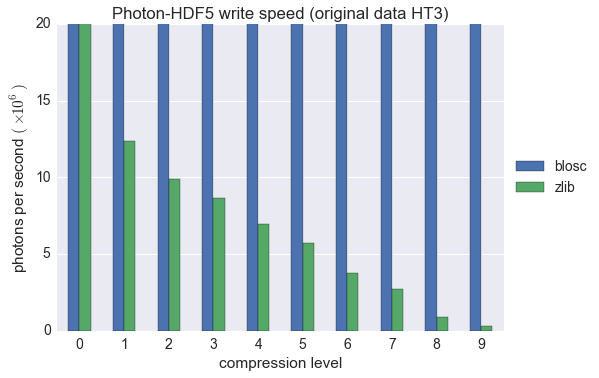

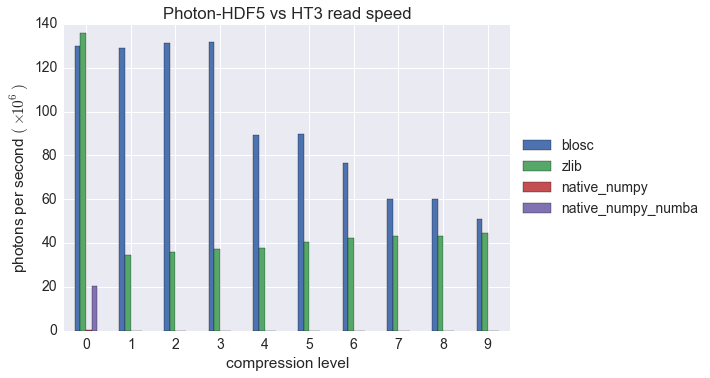

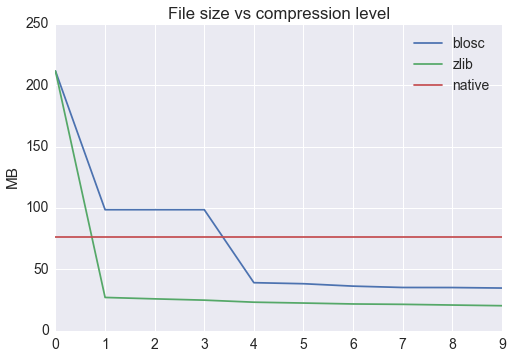

In [14]:
((pq_num_photons/1e6)/ht3_write_speed).plot(kind='bar')
plot_style()
plt.title('Photon-HDF5 write speed (original data HT3)')
plt.ylabel(r'photons per second $(\times 10^6)$')
savefig('ht3_write_speed')
plt.ylim(0, 20);
savefig('ht3_write_speed_zoom')

((pq_num_photons/1e6)/ht3_read_speed).plot(kind='bar')
plot_style()
plt.title('Photon-HDF5 vs HT3 read speed')
plt.ylabel(r'photons per second $(\times 10^6)$')
savefig('ht3_read_speed')

(ht3_file_size/(2**20)).plot()
plt.title('File size vs compression level')
plt.ylabel('MB');
savefig('ht3_file_size')

> **NOTE**: `native_numpy_numba` case reads the native file (HT3) with [numba-optimized](http://numba.pydata.org/) numpy code. Benchmarks are performed with a cold cache (after reboot). On second execution the numba version become 280 ms. I haven't investigated whether this difference is due data file caching, JIT compilation time or caching of LLVM libraries used by numba.

# Becker & Hickl summary

Write speed, read speed and file size for compressions ranging from 0 (no compression) to 9 (maximum compression). In the legends, **blosc** and **zlib** refer to using Photon-HDF5 files with *blosc* or *zlib* (default) compression. **native_numpy** refer to reading the native binay file (SPC) via a python/numpy code.

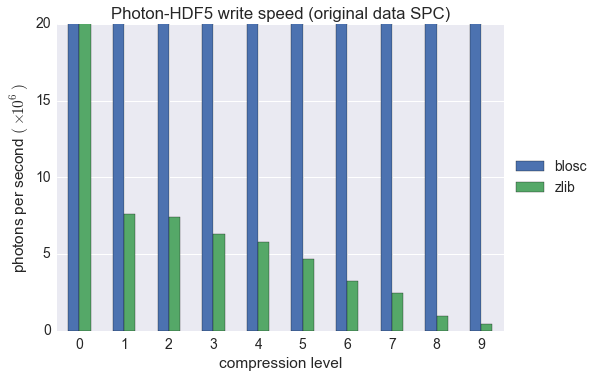

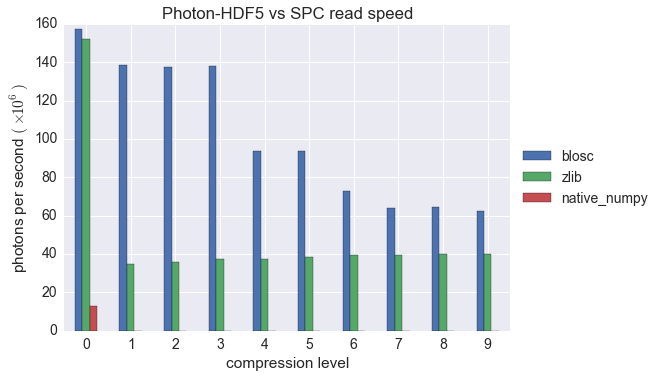

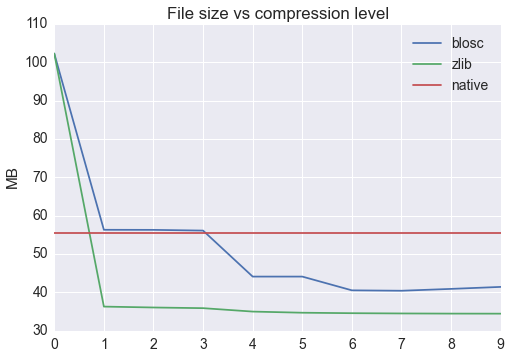

In [17]:
((bh_num_photons/1e6)/bh_write_speed).plot(kind='bar')
plot_style()
plt.title('Photon-HDF5 write speed (original data SPC)')
plt.ylabel(r'photons per second $(\times 10^6)$')
savefig('bh_write_speed')
#display.display(plt.gcf())
plt.ylim(0, 20);
savefig('bh_write_speed_zoom')

((bh_num_photons/1e6)/bh_read_speed).plot(kind='bar')
plot_style()
plt.title('Photon-HDF5 vs SPC read speed')
plt.ylabel(r'photons per second $(\times 10^6)$')
#display.display(plt.gcf())
#plt.ylim(0, 50);
savefig('bh_read_speed_zoom')


(bh_file_size/(2**20)).plot()
plt.title('File size vs compression level')
plt.ylabel('MB');
savefig('bh_file_size')

# 8-spot summary

Write speed, read speed and file size for compressions ranging from 0 (no compression) to 9 (maximum compression). In the legends, **blosc** and **zlib** refer to using Photon-HDF5 files with *blosc* or *zlib* (default) compression. **native_numpy** refer to reading the native binay file (raw 64 bits per photon) via a python/numpy code.

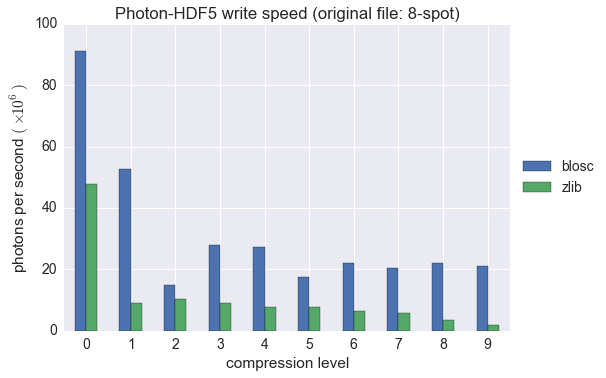

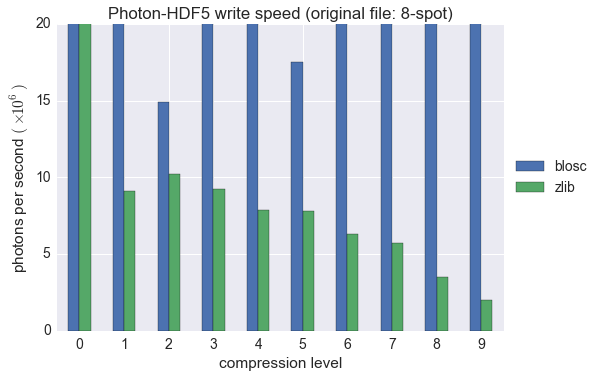

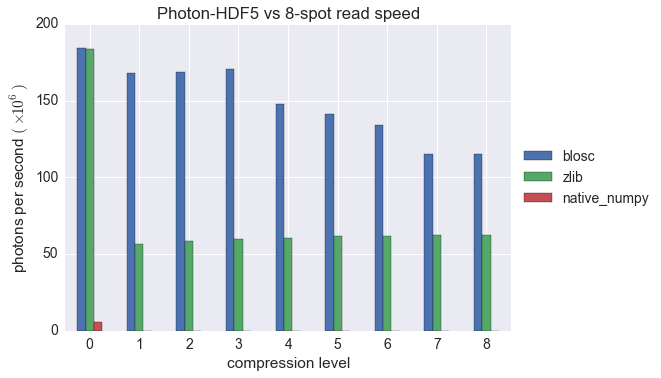

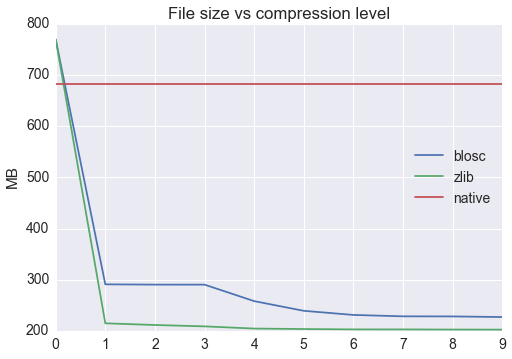

In [18]:
((mspot_num_photons/1e6)/mspot_write_speed).plot(kind='bar')
plot_style()
plt.title('Photon-HDF5 write speed (original file: 8-spot)')
plt.ylabel(r'photons per second $(\times 10^6)$')
display.display(plt.gcf())
savefig("8spot_write_speed")
plt.ylim(0, 20);

((mspot_num_photons/1e6)/mspot_read_speed).plot(kind='bar')
plot_style()
plt.title('Photon-HDF5 vs 8-spot read speed')
plt.ylabel(r'photons per second $(\times 10^6)$')
savefig("8spot_read_speed")
#display.display(plt.gcf())
#plt.ylim(0, 1);

(mspot_file_size/(2**20)).plot()
plt.title('File size vs compression level')
plt.ylabel('MB');
savefig("8spot_file_size");